# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan berjudul "Student Depression Dataset". Dataset ini memiliki
   
   - Sumber: Kaggle Adil Shamim: "Student Depression Dataset"

2. **Dataset Information**

   Dataset "Student Depression Dataset" adalah menghimpun berbagai informasi yang bertujuan untuk memahami, menganalisis, dan memprediksi tingkat depresi di kalangan mahasiswa atau pelajar. Terdapat 18 fitur pada dataset ini, yang terdiri dari  

| No | **Nama Kolom**                           | **Deskripsi**                                                                                                                                           |
|----|------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | `id`                                     | Identifier unik yang diberikan untuk setiap data mahasiswa dalam dataset.                                                                              |
| 2  | `Gender`                                 | Jenis kelamin mahasiswa (contoh: Male, Female, Other), digunakan untuk menganalisis tren kesehatan mental berdasarkan gender.                         |
| 3  | `Age`                                    | Usia mahasiswa dalam satuan tahun.                                                                                                                     |
| 4  | `City`                                   | Kota atau wilayah tempat tinggal mahasiswa, memberikan konteks geografis dalam analisis.                                                              |
| 5  | `Profession`                             | Bidang pekerjaan atau studi mahasiswa, yang dapat menunjukkan faktor stres akademik atau pekerjaan.                                                   |
| 6  | `Academic Pressure`                      | Ukuran tingkat tekanan akademik yang dialami mahasiswa, termasuk stres akibat ujian, tugas, dan tuntutan akademik.                                   |
| 7  | `Work Pressure`                          | Ukuran tekanan terkait pekerjaan bagi mahasiswa yang juga bekerja sambil belajar.                                                                     |
| 8  | `CGPA`                                   | Nilai rata-rata kumulatif mahasiswa, mencerminkan kinerja akademik secara keseluruhan.                                                                |
| 9  | `Study Satisfaction`                     | Indikator kepuasan mahasiswa terhadap studi yang dijalani, berkaitan dengan kesejahteraan mental.                                                     |
| 10 | `Job Satisfaction`                       | Ukuran kepuasan mahasiswa terhadap pekerjaan atau lingkungan kerja, jika ada.                                                                          |
| 11 | `Sleep Duration`                         | Rata-rata durasi tidur harian mahasiswa (dalam jam), faktor penting dalam kesehatan mental.                                                           |
| 12 | `Dietary Habits`                         | Penilaian terhadap pola makan dan kebiasaan nutrisi mahasiswa, yang dapat memengaruhi suasana hati dan kesehatan secara umum.                        |
| 13 | `Degree`                                 | Gelar akademik atau program studi yang sedang ditempuh mahasiswa.                                                                                      |
| 14 | `Have you ever had suicidal thoughts?`   | Indikator biner (Yes/No) yang menunjukkan apakah mahasiswa pernah memiliki pikiran untuk bunuh diri.                                                  |
| 15 | `Work/Study Hours`                       | Rata-rata jumlah jam per hari yang dihabiskan untuk bekerja atau belajar, yang bisa berdampak pada tingkat stres.                                     |
| 16 | `Financial Stress`                       | Ukuran tingkat stres yang dialami akibat permasalahan finansial, yang dapat memengaruhi kesehatan mental.                                            |
| 17 | `Family History of Mental Illness`       | Menunjukkan apakah ada riwayat gangguan mental dalam keluarga (Yes/No), faktor yang relevan dalam kecenderungan kesehatan mental.                    |
| 18 | `Depression`                             | Variabel target yang menunjukkan apakah mahasiswa mengalami depresi (Yes/No). Ini adalah fokus utama dalam analisis dataset.                         |


Bedasarkan Informasi dataset tersebut, berikut adalah pengelompokan (grup) variabel.

1. Informasi Demografis: Gender, Age, City, Profession, Degree
2. Faktor Akademik: Academic Pressure, CGPA, Study Satisfaction, Work/Study Hours
3. Faktor Pekerjaan: Work Pressure, Job Satisfaction
4. Faktor Gaya Hidup & Kesehatan: Sleep Duration, Dietary Habits
5. Faktor Psikososial: Financial Stress, Family History of Mental Illness, Have you ever had suicidal thoughts?
6. Target: Depression

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
df = pd.read_csv('student_depression_dataset_raw.csv')

## Data Understanding

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print(df.describe(include='all'))

                   id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN           NaN         

### Check Missing Values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


### Check Duplicate Values

In [ ]:
num_duplicates = df.duplicated().sum()
percent_duplicates = (num_duplicates / len(df)) * 100

print(f"Jumlah data duplikat: {num_duplicates}")
print(f"Persentase data duplikat: {percent_duplicates:.2f}%")

Jumlah data duplikat: 0
Persentase data duplikat: 0.00%


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Distribusi Umur**

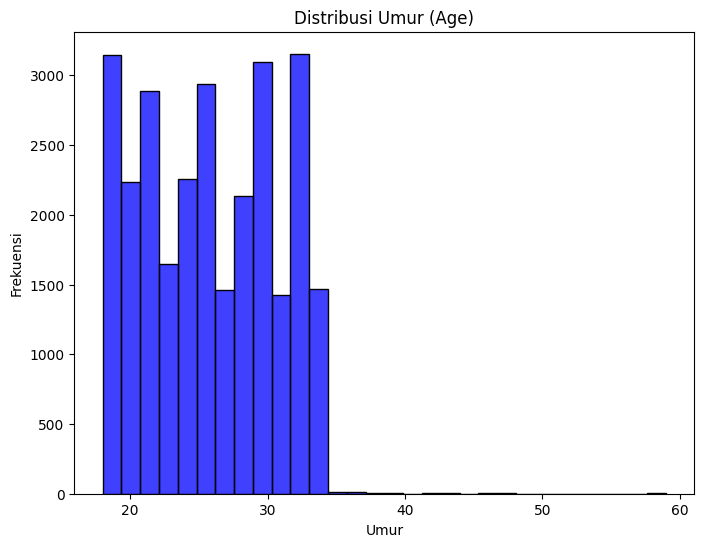

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, color='blue')
plt.title('Distribusi Umur (Age)')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

## **Distribusi Nilai Rata-rata Kumulatif Mahasiswa (CGPA)**

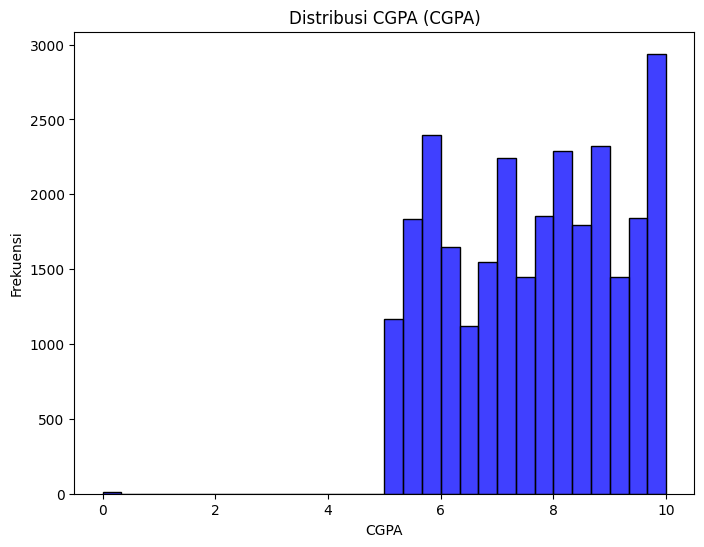

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'], bins=30, color='blue')
plt.title('Distribusi CGPA (CGPA)')
plt.xlabel('CGPA')
plt.ylabel('Frekuensi')
plt.show()

## **Distribusi	Depression**

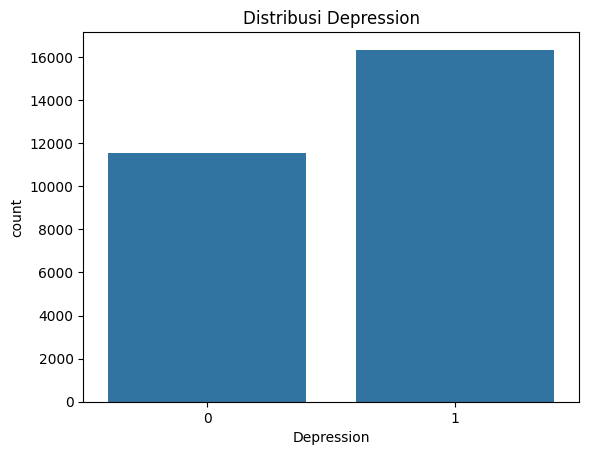

In [ ]:
sns.countplot(x='Depression', data=df)
plt.title('Distribusi Depression')
plt.show()

## **Outlier**

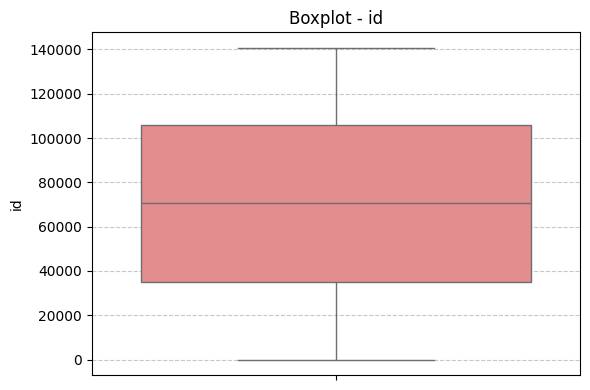

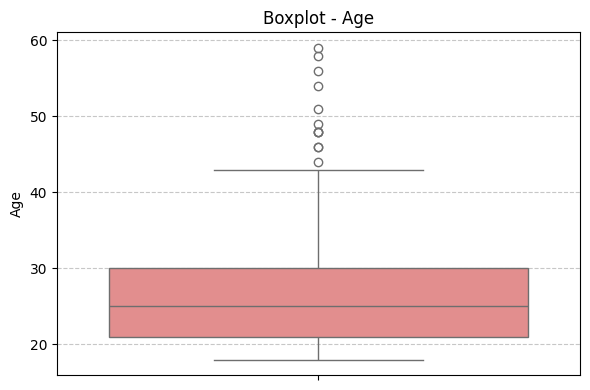

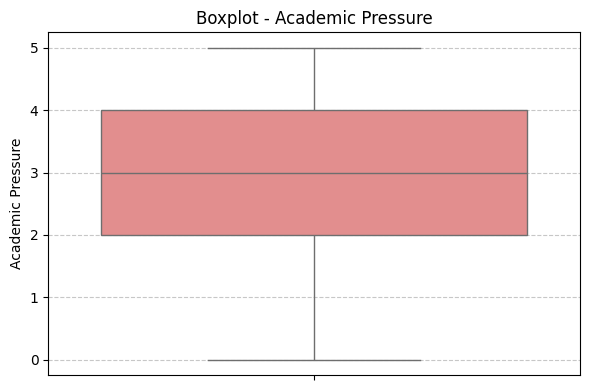

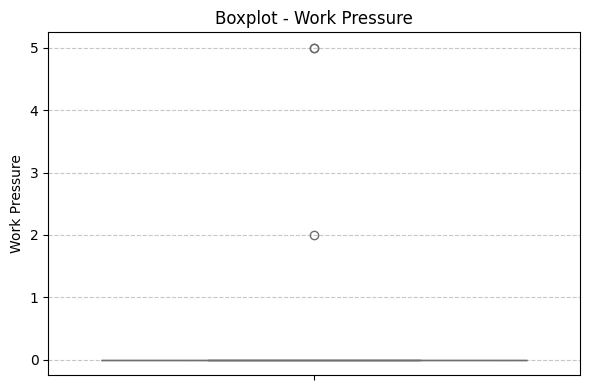

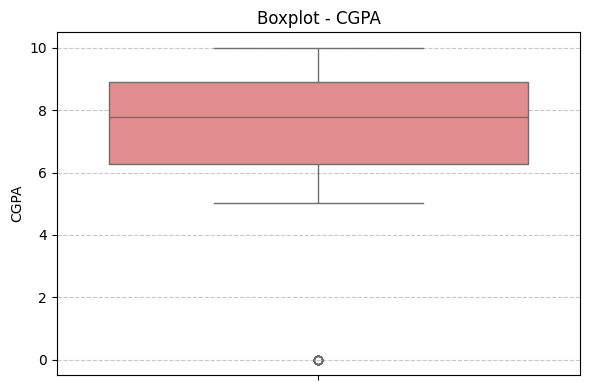

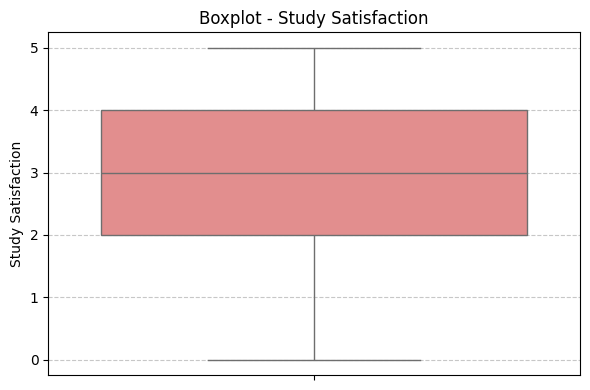

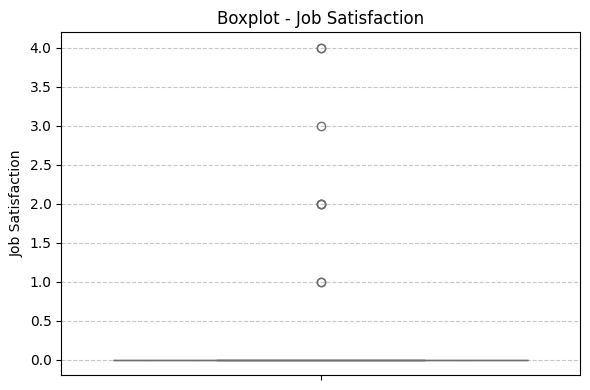

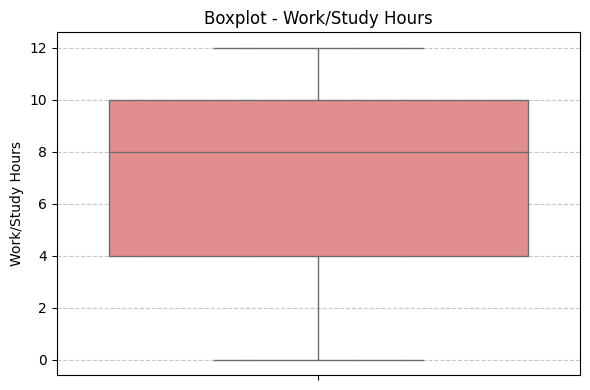

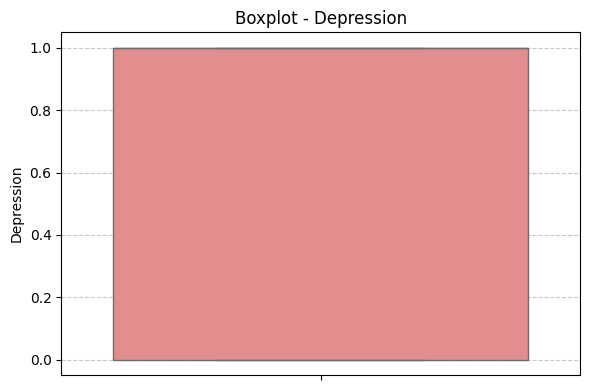

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop untuk buat boxplot per kolom
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f'Boxplot - {col}')
    plt.ylabel(col)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## **Correlation Distribution**

### Numeric

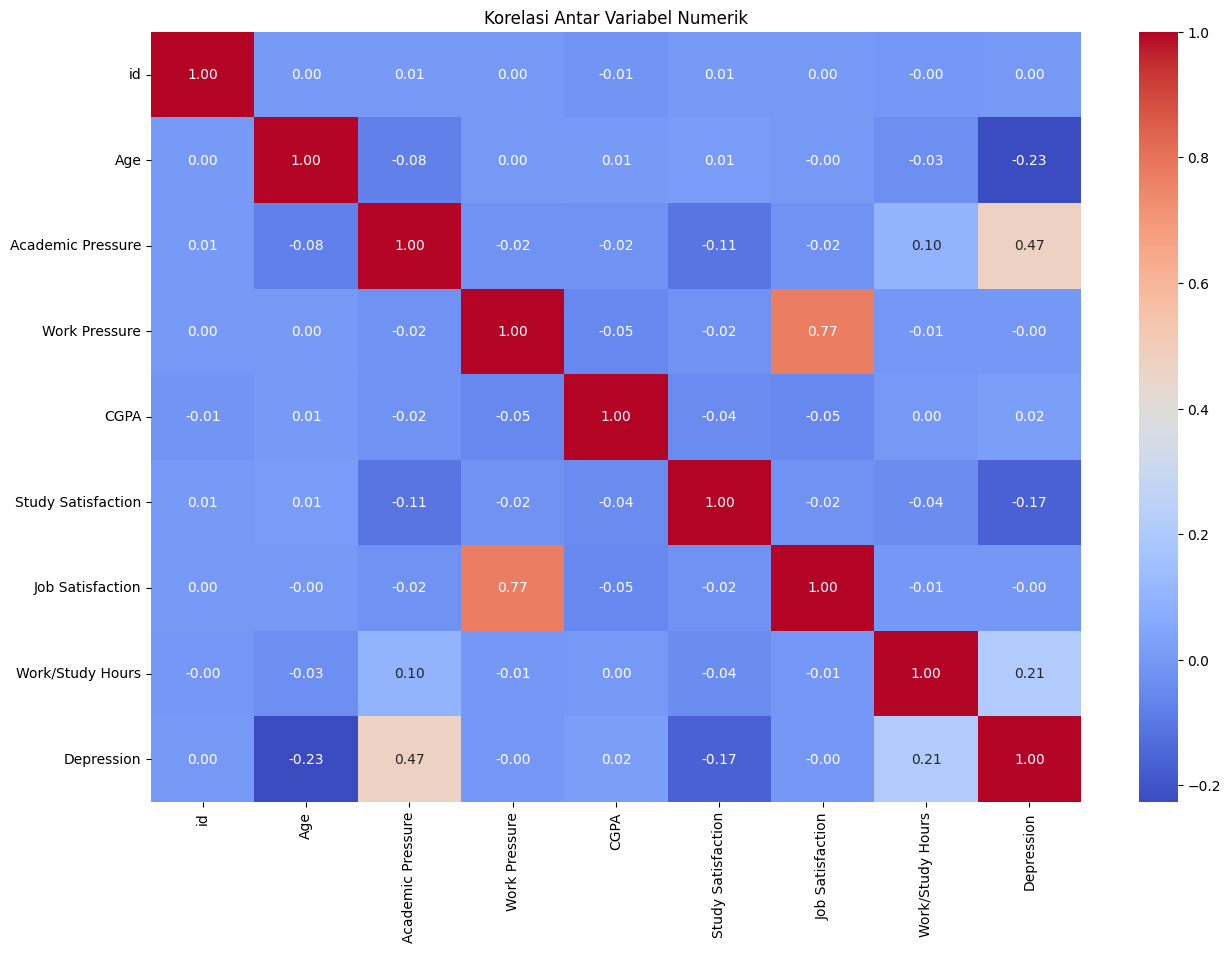

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

### Categorical

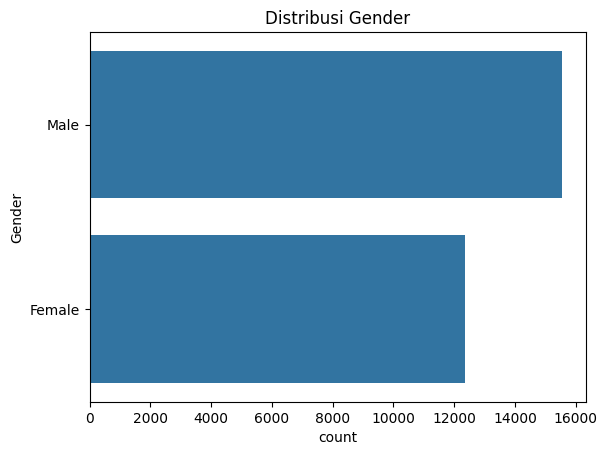

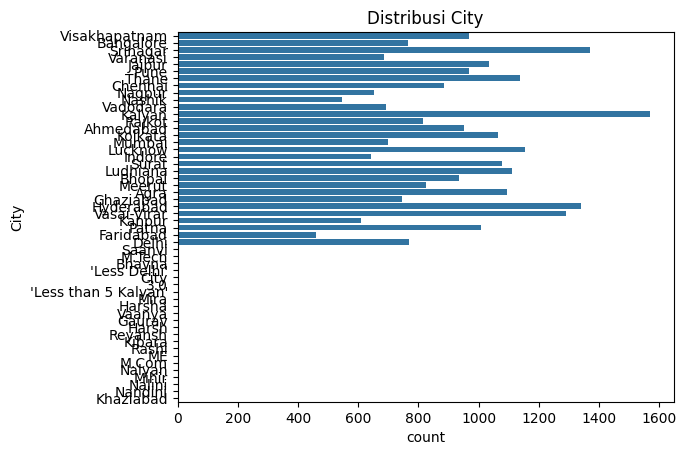

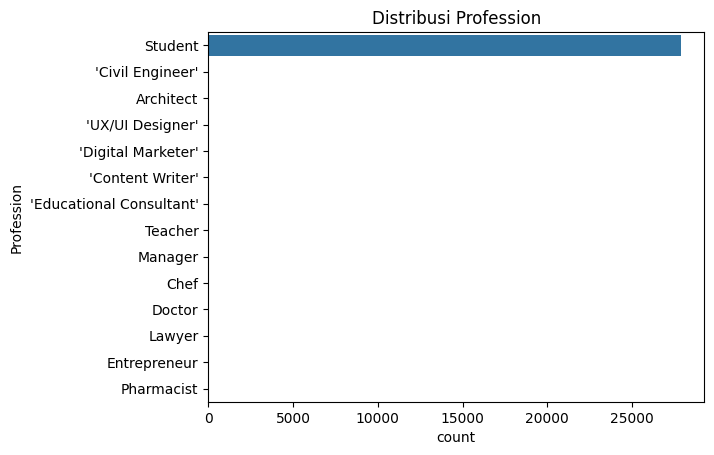

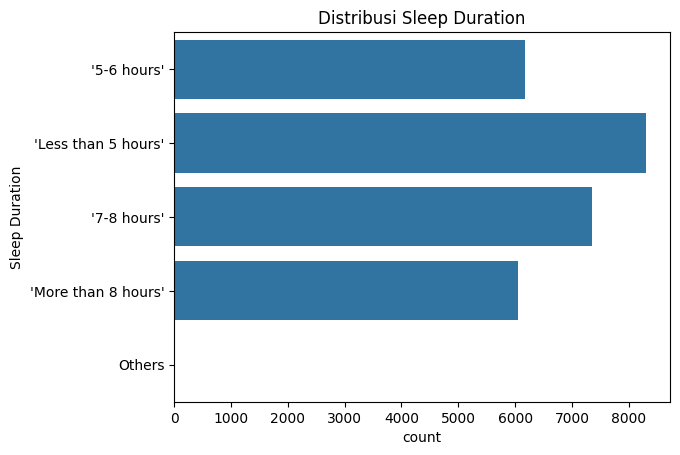

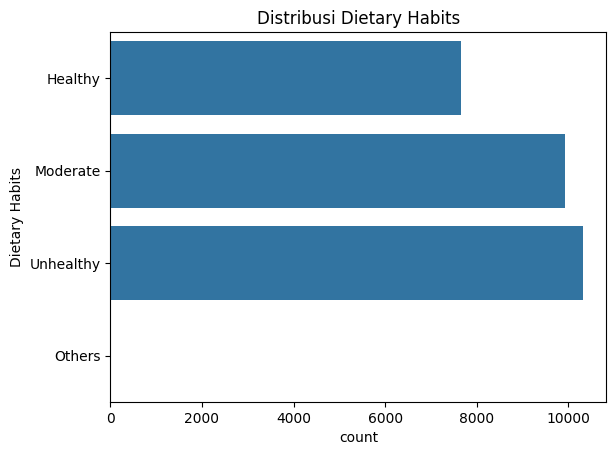

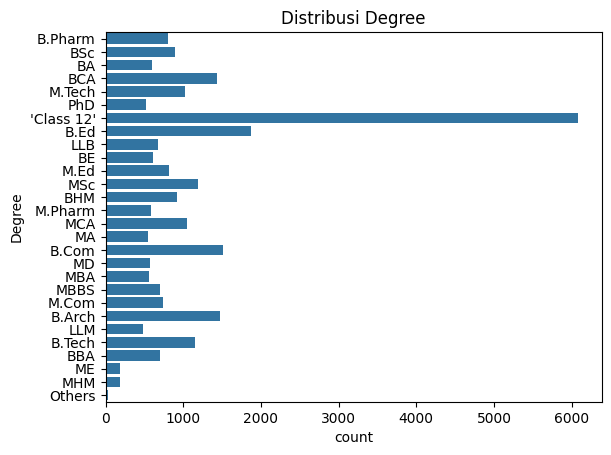

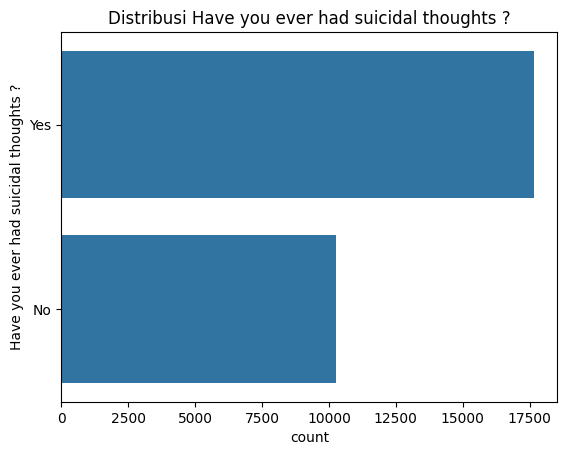

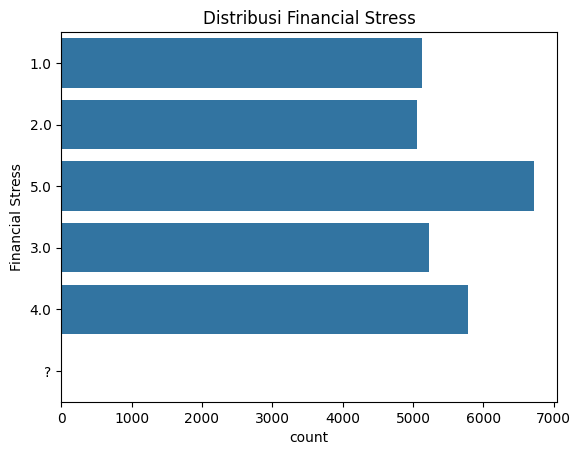

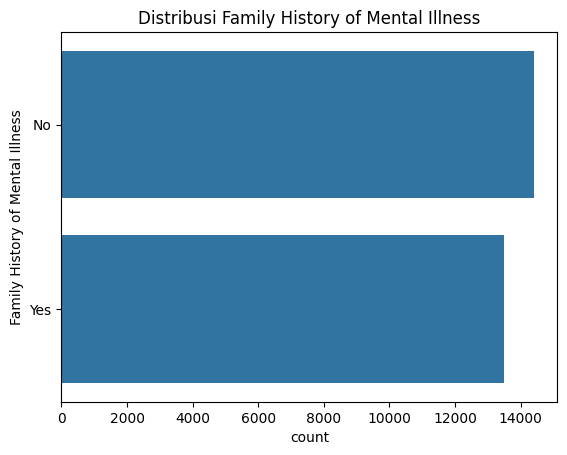

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    plt.figure()
    sns.countplot(y=col, data=df)
    plt.title(f'Distribusi {col}')
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Menghapus atau Menangani Data Kosong (Missing Values)**

Bedasarkan pengecekan pada data understanding, bahwa belum perlu mengisi nilai kosong.

## **Menghapus Data Duplikat**

Bedasarkan pengecekan pada data understanding, bahwa data yang terduplikat tidak ada, tidak perlu ada tindakan.

## **Perbaikan Tipe data**

In [ ]:
# Repair Type Column

cols_to_convert = ['Academic Pressure', 'Work Pressure', 'Financial Stress', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'CGPA']
for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].replace('?', np.nan)

# Convert the columns to float, coercing errors
for col in cols_to_convert:
     if col in df.columns:
         df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## **Deteksi dan Penanganan Outlier**

## **Feature Engineering**

Mengatasi Nilai NaN

In [ ]:
# Mengisi NaN dengan 0 sebelum perhitungan
df['Academic Pressure'] = df['Academic Pressure'].fillna(0)
df['Work Pressure'] = df['Work Pressure'].fillna(0)
df['Financial Stress'] = df['Financial Stress'].fillna(0)
df['Study Satisfaction'] = df['Study Satisfaction'].fillna(1)
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(1)

In [ ]:
# Total Stress: jumlah tekanan dari akademik, pekerjaan, dan finansial
df['Total_Stress'] = (df['Academic Pressure'] + df['Work Pressure'] + df['Financial Stress']).round(3)

# Selisih antara kepuasan studi dan kerja
df['Satisfaction_Balance'] = (df['Study Satisfaction'] + df['Job Satisfaction']).round(3)

# Selisih antara tekanan studi dan kerja
df['Pressure_Balance'] = (df['Academic Pressure'] + df['Work Pressure']).round(3)

# Ratio Stress antara pressure dan satisfaction
df['Stress_Balance_Ratio'] = (df['Pressure_Balance'] / df['Satisfaction_Balance'].replace(0, np.nan)).round(3).fillna(0)

## **Binning (Pengelompokan Data)**

### Age Group

In [ ]:
# Definisikan fungsi binning age group
def bin_age(age):
    if age < 20:
        return 'Teen'
    elif 20 <= age <= 24:
        return 'Young Adult'
    elif 25 <= age <= 29:
        return 'Adult'
    else:
        return 'Older Adult'

# Terapkan binning
df['Age_Group'] = df['Age'].apply(bin_age)

# Tampilkan hasil
print(df)

           id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...  \
0             

### CGPA Category

In [ ]:
# Fungsi binning CGPA
def categorize_cgpa(cgpa):
    if cgpa < 2.5:
        return 'Low'
    elif 2.5 <= cgpa <= 3.2:
        return 'Medium'
    else:
        return 'High'

# Terapkan binning
df['CGPA_Category'] = df['CGPA'].apply(categorize_cgpa)

# Tampilkan hasil
print(df)

           id  Gender   Age           City Profession  Academic Pressure  \
0           2    Male  33.0  Visakhapatnam    Student                5.0   
1           8  Female  24.0      Bangalore    Student                2.0   
2          26    Male  31.0       Srinagar    Student                3.0   
3          30  Female  28.0       Varanasi    Student                3.0   
4          32  Female  25.0         Jaipur    Student                4.0   
...       ...     ...   ...            ...        ...                ...   
27896  140685  Female  27.0          Surat    Student                5.0   
27897  140686    Male  27.0       Ludhiana    Student                2.0   
27898  140689    Male  31.0      Faridabad    Student                3.0   
27899  140690  Female  18.0       Ludhiana    Student                5.0   
27900  140699    Male  27.0          Patna    Student                4.0   

       Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  ...  \
0             

## **Hapus Kolom Yang Tidak Bermanfaat**

In [ ]:
df=df.drop(['id'],axis=1)

## **Encoding Data Kategorikal**

One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd # Ensure pandas is imported

# Daftar kolom kategorikal
categorical_cols = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness' ]

# Dictionary untuk menyimpan One-Hot Encoder tiap kolom
one_hot_encoders = {}

# Inisialisasi OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

df_encoded = df.copy()
cols_to_drop = []
encoded_dfs = []

for col in categorical_cols:
    if col in df_encoded.columns:
        # Cek dan tangani nilai kosong (jika ada)
        if df_encoded[col].isnull().any():
            df_encoded[col] = df_encoded[col].fillna('Unknown')  # atau gunakan strategi lain

        # Buat dan simpan encoder

        one_hot_encoded = encoder.fit_transform(df_encoded[[col]])

        feature_names = encoder.get_feature_names_out([col])
        one_hot_df = pd.DataFrame(one_hot_encoded,
                                  columns=feature_names,
                                  index=df_encoded.index)

        encoded_dfs.append(one_hot_df)
        cols_to_drop.append(col)

        # Store the fitted encoder
        one_hot_encoders[col] = encoder

    else:
        print(f"Kolom '{col}' tidak ditemukan di DataFrame.")

df_encoded = df_encoded.drop(cols_to_drop, axis=1)
df = pd.concat([df_encoded] + encoded_dfs, axis=1)


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Daftar kolom kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Dictionary untuk menyimpan LabelEncoder tiap kolom
label_encoders = {}

# Looping setiap kolom kategorikal
for col in categorical_cols:
    if col in df.columns:
        # Cek dan tangani nilai kosong (jika ada)
        if df[col].isnull().any():
            df[col] = df[col].fillna('Unknown')  # atau gunakan strategi lain

        # Buat dan simpan encoder
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Pastikan data berupa string
        label_encoders[col] = le
    else:
        print(f"Kolom '{col}' tidak ditemukan di DataFrame.")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27901 non-null  float64
 1   City                                       27901 non-null  int64  
 2   Profession                                 27901 non-null  int64  
 3   Academic Pressure                          27901 non-null  float64
 4   Work Pressure                              27901 non-null  float64
 5   CGPA                                       27901 non-null  float64
 6   Study Satisfaction                         27901 non-null  float64
 7   Job Satisfaction                           27901 non-null  float64
 8   Sleep Duration                             27901 non-null  int64  
 9   Dietary Habits                             27901 non-null  int64  
 10  Degree                

## **Normalisasi atau Standarisasi Fitur**

In [ ]:
# PILIH fitur numerik yang ingin dinormalisasi/standardisasi
numerical_features = [
    'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction',
    'Work/Study Hours', 'Financial Stress',
    'Total_Stress', 'Satisfaction_Balance', 'Pressure_Balance',
    'Stress_Balance_Ratio'
]

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## **Save Dataset Preprocessing**

In [ ]:
df.to_csv('student_depression_preprocessing.csv', index=False)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27901 non-null  float64
 1   City                                       27901 non-null  int64  
 2   Profession                                 27901 non-null  int64  
 3   Academic Pressure                          27901 non-null  float64
 4   Work Pressure                              27901 non-null  float64
 5   CGPA                                       27901 non-null  float64
 6   Study Satisfaction                         27901 non-null  float64
 7   Job Satisfaction                           27901 non-null  float64
 8   Sleep Duration                             27901 non-null  int64  
 9   Dietary Habits                             27901 non-null  int64  
 10  Degree                